# Loading important libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import IPython
import IPython.display
import matplotlib as mpl
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import mean_absolute_error

%matplotlib inline

trainval=pd.read_csv("trainvalid.csv")
test=pd.read_csv("test.csv")

# Data Exploration

In [2]:
trainval

,datetime,temperature,humidity,pressure,weather,wind_direction,wind_speed
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-10-01 13:00:00,291.870000,88.0,1013.0,mist,0.0,0.0
2,2012-10-01 14:00:00,291.868186,88.0,1013.0,sky is clear,0.0,0.0
3,2012-10-01 15:00:00,291.862844,88.0,1013.0,sky is clear,0.0,0.0
4,2012-10-01 16:00:00,291.857503,88.0,1013.0,sky is clear,0.0,0.0
...,...,...,...,...,...,...,...
45008,2017-11-19 20:00:00,295.440000,17.0,1017.0,sky is clear,345.0,1.0
45009,2017-11-19 21:00:00,296.020000,16.0,1016.0,sky is clear,345.0,1.0
45010,2017-11-19 22:00:00,296.510000,17.0,1015.0,sky is clear,345.0,1.0
45011,2017-11-19 23:00:00,297.090000,17.0,1014.0,sky is clear,324.0,0.0


In [3]:
#checking frequency of each category for 'weather' column
trainval['weather'].value_counts()

sky is clear                    25983
haze                             3490
mist                             2938
broken clouds                    2564
overcast clouds                  2432
scattered clouds                 2266
light rain                       1946
few clouds                       1754
fog                               560
moderate rain                     481
smoke                             203
heavy intensity rain              127
light intensity drizzle           102
dust                               64
proximity thunderstorm             25
very heavy rain                    20
thunderstorm                       17
thunderstorm with light rain       13
shower rain                         8
drizzle                             5
proximity shower rain               4
light intensity shower rain         3
squalls                             3
thunderstorm with rain              2
thunderstorm with heavy rain        2
Name: weather, dtype: int64

In [4]:
#number of categories in 'weather' column
len(trainval['weather'].value_counts())

25

In [5]:
#statistics of each column in dataset
trainval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45013 entries, 0 to 45012
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   datetime        45013 non-null  object 
 1   temperature     45010 non-null  float64
 2   humidity        44861 non-null  float64
 3   pressure        44761 non-null  float64
 4   weather         45012 non-null  object 
 5   wind_direction  45012 non-null  float64
 6   wind_speed      45012 non-null  float64
dtypes: float64(5), object(2)
memory usage: 2.4+ MB


In [6]:
#converting datetime column to pandas datetime for train and test data(Kaggle)
date_time = pd.to_datetime(trainval.pop('datetime'), format='%Y.%m.%d %H:%M:%S')

In [7]:
date_time_test=pd.to_datetime(test.pop('datetime'), format='%Y.%m.%d %H:%M:%S')

In [8]:
datetime

<module 'datetime' from '/usr/lib/python3.8/datetime.py'>

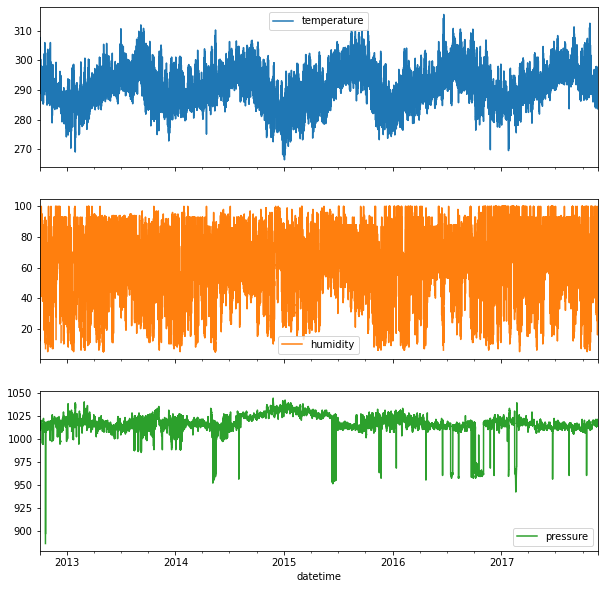

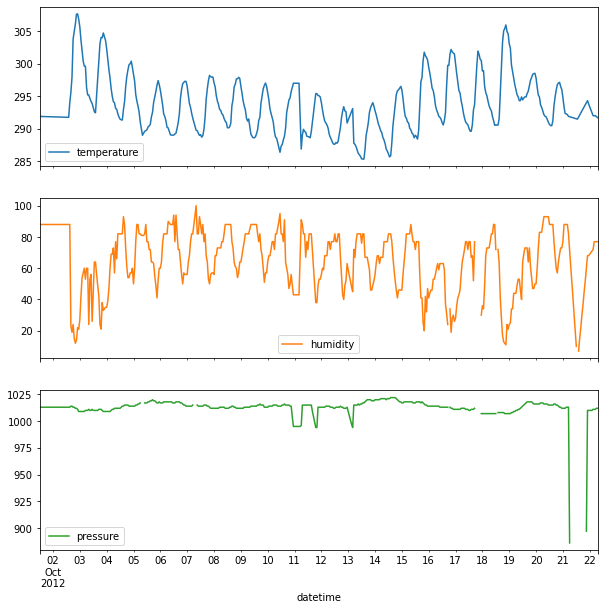

In [9]:
#plotting temperature, humidity and pressure for full data and first 500 values
plot_cols = ['temperature', 'humidity', 'pressure']
plot_features = trainval[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True,figsize=(10,10))

plot_features = trainval[plot_cols][:500]
plot_features.index = date_time[:500]
_ = plot_features.plot(subplots=True,figsize=(10,10))

In [10]:
trainval.describe()

,temperature,humidity,pressure,wind_direction,wind_speed
count,45010.000000,44861.000000,44761.000000,45012.000000,45012.000000
mean,290.841547,62.823767,1015.915127,139.733804,1.220652
std,6.465152,21.786687,11.316175,105.545576,1.435687
min,266.503667,5.000000,886.000000,0.000000,0.000000
25%,286.370000,48.000000,1013.000000,29.000000,0.000000
50%,290.530000,66.000000,1016.000000,140.000000,1.000000
75%,295.080000,81.000000,1021.000000,230.000000,2.000000
max,315.470000,100.000000,1044.000000,360.000000,17.000000


# Data Pre-processing

In [11]:
#filling missing values with backward fill for train set and test set(Kaggle)
trainval=trainval.fillna(method="bfill")

In [12]:
test=test.fillna(method="bfill")

Text(0, 0.5, 'Wind speed')

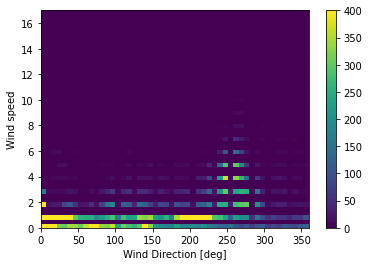

In [13]:
#plotting wind direction vs wind speed for train set
plt.hist2d(trainval['wind_direction'], trainval['wind_speed'], bins=(50, 50),vmax=400)
plt.colorbar()
plt.xlabel('Wind Direction [deg]')
plt.ylabel('Wind speed')

In [14]:
# converting wind direction and wind speed into single vector for train set and test set(kaggle)
wind_speed = trainval.pop('wind_speed')

# Converting to radians.
wd_rad = trainval.pop('wind_direction')*np.pi / 180

# Calculate the wind x and y components.
trainval['Wind_x'] = wind_speed*np.cos(wd_rad)
trainval['Wind_y'] = wind_speed*np.sin(wd_rad)

In [15]:
wind_speed = test.pop('wind_speed')

# Converting to radians.
wd_rad = test.pop('wind_direction')*np.pi / 180

# Calculate the wind x and y components.
test['Wind_x'] = wind_speed*np.cos(wd_rad)
test['Wind_y'] = wind_speed*np.sin(wd_rad)

In [16]:
trainval

,temperature,humidity,pressure,weather,Wind_x,Wind_y
0,291.870000,88.0,1013.0,mist,0.000000,0.000000
1,291.870000,88.0,1013.0,mist,0.000000,0.000000
2,291.868186,88.0,1013.0,sky is clear,0.000000,0.000000
3,291.862844,88.0,1013.0,sky is clear,0.000000,0.000000
4,291.857503,88.0,1013.0,sky is clear,0.000000,0.000000
...,...,...,...,...,...,...
45008,295.440000,17.0,1017.0,sky is clear,0.965926,-0.258819
45009,296.020000,16.0,1016.0,sky is clear,0.965926,-0.258819
45010,296.510000,17.0,1015.0,sky is clear,0.965926,-0.258819
45011,297.090000,17.0,1014.0,sky is clear,0.000000,-0.000000


(-11.0, 13.0, -15.974774553360445, 10.724622203665692)

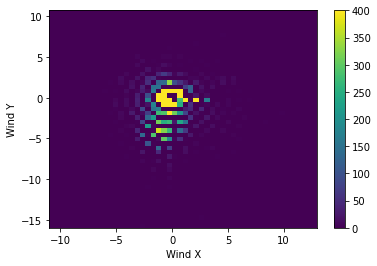

In [17]:
#plotting the x and y components of wind vector train set
plt.hist2d(trainval['Wind_x'], trainval['Wind_y'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind X')
plt.ylabel('Wind Y')
ax = plt.gca()
ax.axis('tight')

In [18]:
#converting train set and test set date time to sin and cos components for periodicity
timestamp_h = date_time.map(datetime.datetime.timestamp)/3600

In [19]:
day = 24
year = (365.2425)*day

trainval['Day sin'] = np.sin(timestamp_h * (2 * np.pi / day))
trainval['Day cos'] = np.cos(timestamp_h * (2 * np.pi / day))
trainval['Year sin'] = np.sin(timestamp_h * (2 * np.pi / year))
trainval['Year cos'] = np.cos(timestamp_h * (2 * np.pi / year))

In [20]:
timestamp_h_test = date_time_test.map(datetime.datetime.timestamp)/3600

In [21]:
test['Day sin'] = np.sin(timestamp_h_test * (2 * np.pi / day))
test['Day cos'] = np.cos(timestamp_h_test * (2 * np.pi / day))
test['Year sin'] = np.sin(timestamp_h_test * (2 * np.pi / year))
test['Year cos'] = np.cos(timestamp_h_test * (2 * np.pi / year))

Text(0.5, 1.0, 'Time of day signal')

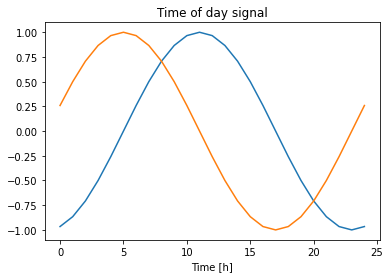

In [22]:
#plotting time signal for train set
plt.plot(np.array(trainval['Day sin'])[:25])
plt.plot(np.array(trainval['Day cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

In [23]:
trainval

,temperature,humidity,pressure,weather,Wind_x,Wind_y,Day sin,Day cos,Year sin,Year cos
0,291.870000,88.0,1013.0,mist,0.000000,0.000000,-0.965926,2.588190e-01,-0.999933,0.011608
1,291.870000,88.0,1013.0,mist,0.000000,0.000000,-0.866025,5.000000e-01,-0.999924,0.012325
2,291.868186,88.0,1013.0,sky is clear,0.000000,0.000000,-0.707107,7.071068e-01,-0.999915,0.013041
3,291.862844,88.0,1013.0,sky is clear,0.000000,0.000000,-0.500000,8.660254e-01,-0.999905,0.013758
4,291.857503,88.0,1013.0,sky is clear,0.000000,0.000000,-0.258819,9.659258e-01,-0.999895,0.014475
...,...,...,...,...,...,...,...,...,...,...
45008,295.440000,17.0,1017.0,sky is clear,0.965926,-0.258819,0.866025,5.000000e-01,-0.654451,0.756104
45009,296.020000,16.0,1016.0,sky is clear,0.965926,-0.258819,0.965926,2.588190e-01,-0.653909,0.756573
45010,296.510000,17.0,1015.0,sky is clear,0.965926,-0.258819,1.000000,1.086883e-11,-0.653367,0.757042
45011,297.090000,17.0,1014.0,sky is clear,0.000000,-0.000000,0.965926,-2.588190e-01,-0.652824,0.757510


In [24]:
# converting weather column for train set and test set into one hot vectors and concatenating datasets
test1=pd.concat([trainval,test])

In [25]:
weather_onehot=pd.get_dummies(trainval.weather,prefix='weather')

In [26]:
weather_onehot_test=pd.get_dummies(test1.weather,prefix='weather')

In [27]:
weather_onehot_test1=weather_onehot_test[-240:]

In [28]:
processed_data_trainval=pd.concat([trainval,weather_onehot],axis=1)

In [29]:
processed_data_test=pd.concat([test,weather_onehot_test1],axis=1)

In [30]:
processed_data_trainval.pop('weather')
processed_data_test.pop('weather')

0      sky is clear
1        light rain
2      sky is clear
3      sky is clear
4      sky is clear
           ...     
235    sky is clear
236    sky is clear
237    sky is clear
238    sky is clear
239    sky is clear
Name: weather, Length: 240, dtype: object

In [31]:
trainval.pop("weather")

0                mist
1                mist
2        sky is clear
3        sky is clear
4        sky is clear
             ...     
45008    sky is clear
45009    sky is clear
45010    sky is clear
45011    sky is clear
45012    sky is clear
Name: weather, Length: 45013, dtype: object

In [32]:
test.pop("weather")

0      sky is clear
1        light rain
2      sky is clear
3      sky is clear
4      sky is clear
           ...     
235    sky is clear
236    sky is clear
237    sky is clear
238    sky is clear
239    sky is clear
Name: weather, Length: 240, dtype: object

In [33]:
processed_data_test

,temperature,humidity,pressure,Wind_x,Wind_y,Day sin,Day cos,Year sin,Year cos,weather_broken clouds,...,weather_scattered clouds,weather_shower rain,weather_sky is clear,weather_smoke,weather_squalls,weather_thunderstorm,weather_thunderstorm with heavy rain,weather_thunderstorm with light rain,weather_thunderstorm with rain,weather_very heavy rain
0,295.72,26.0,1014.0,-3.673940e-16,-2.000000,7.071068e-01,-7.071068e-01,-0.651737,0.758445,0,...,0,0,1,0,0,0,0,0,0,0
1,292.97,30.0,1014.0,-3.472964e-01,-1.969616,5.000000e-01,-8.660254e-01,-0.651193,0.758912,0,...,0,0,0,0,0,0,0,0,0,0
2,290.71,25.0,1016.0,-1.836970e-16,-1.000000,2.588190e-01,-9.659258e-01,-0.650649,0.759378,0,...,0,0,1,0,0,0,0,0,0,0
3,290.09,72.0,1016.0,0.000000e+00,-0.000000,1.343217e-11,-1.000000e+00,-0.650105,0.759845,0,...,0,0,1,0,0,0,0,0,0,0
4,289.03,44.0,1016.0,8.910065e-01,0.453990,-2.588190e-01,-9.659258e-01,-0.649560,0.760310,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,?,24.0,1016.0,9.455186e-01,0.325568,8.660254e-01,5.000000e-01,-0.515361,0.856973,0,...,0,0,1,0,0,0,0,0,0,0
236,?,21.0,1016.0,9.455186e-01,0.325568,9.659258e-01,2.588190e-01,-0.514747,0.857342,0,...,0,0,1,0,0,0,0,0,0,0
237,?,23.0,1015.0,9.455186e-01,0.325568,1.000000e+00,1.153919e-11,-0.514132,0.857711,0,...,0,0,1,0,0,0,0,0,0,0
238,?,14.0,1016.0,-1.879385e+00,-0.684040,9.659258e-01,-2.588190e-01,-0.513517,0.858079,0,...,0,0,1,0,0,0,0,0,0,0


In [34]:
#dividing train set into train, validation and test set
column_indices = {name: i for i, name in enumerate(processed_data_trainval.columns)}

n = len(trainval)
train_df = trainval[0:int(n*0.7)]
val_df = trainval[int(n*0.7):int(n*0.9)]
test_df = trainval[int(n*0.9):]
weather_onehot_train=weather_onehot[0:int(n*0.7)]
weather_onehot_val=weather_onehot[int(n*0.7):int(n*0.9)]
weather_onehot_test=weather_onehot[int(n*0.9):]
num_features = processed_data_trainval.shape[1]

In [35]:
#normalizing train, validation and test set
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std


In [36]:
test_mean=test_df.mean()
test_std=test_df.std()

test_df=(test_df-train_mean)/train_std

In [37]:
final_train_data=pd.concat([train_df,weather_onehot_train],axis=1)
final_val_data=pd.concat([val_df,weather_onehot_val],axis=1)

In [38]:
final_test_data=pd.concat([test_df,weather_onehot_test],axis=1)

# Windowing 

In [39]:
#making train, validation and test datasets with windows of 24 hours, 72 hours and 120 hours input width for single step models
def make_dataset(data,window_size):
    input_window=[]
    labels=[]
    for i in range(len(data)-window_size):
        input_window.append(data.iloc[i:i+window_size])
        labels.append(data['temperature'].iloc[i+window_size])
    return np.array(input_window),np.array(labels)

In [40]:
train_window24, train_labels24 = make_dataset(final_train_data,24)
val_window24,val_labels24 = make_dataset(final_val_data,24)
test_window24,test_labels24 = make_dataset(final_test_data,24)

train_window72, train_labels72 = make_dataset(final_train_data,72)
val_window72,val_labels72 = make_dataset(final_val_data,72)
test_window72,test_labels72 = make_dataset(final_test_data,72)

train_window120, train_labels120 = make_dataset(final_train_data,120)
val_window120,val_labels120 = make_dataset(final_val_data,120)
test_window120,test_labels120 = make_dataset(final_test_data,120)

In [41]:
print(train_window24.shape,train_labels24.shape)

(31485, 24, 34) (31485,)


# Training Single step models

### Baseline - repeat last time step value

In [42]:
#baseline model for single step models
def baseline(data):
    return data[:,-1,0]

In [43]:
#mean absolute errors for different window models
baseline_test24 = mean_absolute_error(baseline(test_window24),test_labels24)
baseline_test72 = mean_absolute_error(baseline(test_window72),test_labels72)
baseline_test120 = mean_absolute_error(baseline(test_window120),test_labels120)

#### Evaluating baseline model

In [44]:
baseline_test24,baseline_test72,baseline_test120

(0.1316972100314578, 0.1319697321342819, 0.13142991934954829)

### Linear model 

In [45]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [46]:
#function for compiling and fitting models for windows of 24,72 and 120 hours
def compile_and_fit(model):
    model.compile(loss=tf.losses.MeanSquaredError(),metrics=[tf.metrics.MeanAbsoluteError()])
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=2, mode='min')
    
    print('Training Model 1...')
    history24 = model.fit(train_window24,train_labels24,validation_data=(val_window24,val_labels24),
                          callbacks=[early_stopping],epochs=20)
    
    print('Training Model 2...')
    
    history72 = model.fit(train_window72,train_labels72,validation_data=(val_window72,val_labels72),
                          callbacks=[early_stopping],epochs=20)
    
    print('Training Model 3...')
    
    history120 = model.fit(train_window120,train_labels120,validation_data=(val_window120,val_labels120),
                          callbacks=[early_stopping],epochs=20)
    
    return history24,history72,history120

In [47]:
linear_history24,linear_history72,linear_history120 = compile_and_fit(linear)

Training Model 1...
Epoch 1/20
984/984 [==============================] - 2s 1ms/step - loss: 0.6952 - mean_absolute_error: 0.6649 - val_loss: 0.5385 - val_mean_absolute_error: 0.5931
Epoch 2/20
984/984 [==============================] - 1s 595us/step - loss: 0.5029 - mean_absolute_error: 0.5788 - val_loss: 0.5198 - val_mean_absolute_error: 0.5859
Epoch 3/20
984/984 [==============================] - 1s 600us/step - loss: 0.4996 - mean_absolute_error: 0.5782 - val_loss: 0.5163 - val_mean_absolute_error: 0.5836
Epoch 4/20
984/984 [==============================] - 1s 606us/step - loss: 0.4920 - mean_absolute_error: 0.5730 - val_loss: 0.5215 - val_mean_absolute_error: 0.5874
Epoch 5/20
984/984 [==============================] - 1s 604us/step - loss: 0.5050 - mean_absolute_error: 0.5807 - val_loss: 0.5204 - val_mean_absolute_error: 0.5867
Training Model 2...
Epoch 1/20
983/983 [==============================] - 2s 2ms/step - loss: 0.5568 - mean_absolute_error: 0.6027 - val_loss: 0.5713 - 

#### Evaluating linear model

In [48]:
linear_loss24,linear_test24 = linear.evaluate(test_window24,test_labels24,verbose=2)
linear_loss72,linear_test72 = linear.evaluate(test_window72,test_labels72,verbose=2)
linear_loss120,linear_test120 = linear.evaluate(test_window120,test_labels120,verbose=2)

140/140 - 0s - loss: 0.4144 - mean_absolute_error: 0.5185
139/139 - 0s - loss: 0.4480 - mean_absolute_error: 0.5330
137/137 - 0s - loss: 0.4693 - mean_absolute_error: 0.5424


### Dense model

In [49]:
dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=50, activation='relu'),
    tf.keras.layers.Dense(units=50, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [50]:
dense_history24,dense_history72,dense_history120 = compile_and_fit(dense_model)

Training Model 1...
Epoch 1/20
984/984 [==============================] - 6s 2ms/step - loss: 0.5301 - mean_absolute_error: 0.5913 - val_loss: 0.4981 - val_mean_absolute_error: 0.5710
Epoch 2/20
984/984 [==============================] - 1s 1ms/step - loss: 0.4772 - mean_absolute_error: 0.5679 - val_loss: 0.5049 - val_mean_absolute_error: 0.5804
Epoch 3/20
984/984 [==============================] - 1s 1ms/step - loss: 0.4665 - mean_absolute_error: 0.5614 - val_loss: 0.4961 - val_mean_absolute_error: 0.5741
Epoch 4/20
984/984 [==============================] - 1s 1ms/step - loss: 0.4772 - mean_absolute_error: 0.5686 - val_loss: 0.5171 - val_mean_absolute_error: 0.5862
Epoch 5/20
984/984 [==============================] - 1s 1ms/step - loss: 0.4676 - mean_absolute_error: 0.5629 - val_loss: 0.4956 - val_mean_absolute_error: 0.5657
Epoch 6/20
984/984 [==============================] - 1s 1ms/step - loss: 0.4664 - mean_absolute_error: 0.5623 - val_loss: 0.5009 - val_mean_absolute_error: 0.5

#### Evaluating dense model

In [51]:
dense_loss24,dense_test24 = dense_model.evaluate(test_window24,test_labels24,verbose=2)
dense_loss72,dense_test72 = dense_model.evaluate(test_window72,test_labels72,verbose=2)
dense_loss120,dense_test120 = dense_model.evaluate(test_window120,test_labels120,verbose=2)

140/140 - 0s - loss: 0.4321 - mean_absolute_error: 0.5228
139/139 - 0s - loss: 0.4589 - mean_absolute_error: 0.5345
137/137 - 0s - loss: 0.4739 - mean_absolute_error: 0.5409


### RNN with LSTM

In [52]:
lstm_model = tf.keras.models.Sequential([
    
    tf.keras.layers.LSTM(50, return_sequences=False),
    
    tf.keras.layers.Dense(units=1)
])

In [53]:
compile_and_fit(lstm_model)

Training Model 1...
Epoch 1/20
984/984 [==============================] - 34s 8ms/step - loss: 0.0923 - mean_absolute_error: 0.2024 - val_loss: 0.0401 - val_mean_absolute_error: 0.1216
Epoch 2/20
984/984 [==============================] - 8s 8ms/step - loss: 0.0322 - mean_absolute_error: 0.1233 - val_loss: 0.0340 - val_mean_absolute_error: 0.1138
Epoch 3/20
984/984 [==============================] - 7s 7ms/step - loss: 0.0313 - mean_absolute_error: 0.1179 - val_loss: 0.0320 - val_mean_absolute_error: 0.1071
Epoch 4/20
984/984 [==============================] - 8s 8ms/step - loss: 0.0286 - mean_absolute_error: 0.1125 - val_loss: 0.0315 - val_mean_absolute_error: 0.1019
Epoch 5/20
984/984 [==============================] - 7s 8ms/step - loss: 0.0270 - mean_absolute_error: 0.1076 - val_loss: 0.0348 - val_mean_absolute_error: 0.1099
Epoch 6/20
984/984 [==============================] - 8s 8ms/step - loss: 0.0266 - mean_absolute_error: 0.1059 - val_loss: 0.0318 - val_mean_absolute_error: 0.

(<tensorflow.python.keras.callbacks.History at 0x7f83e645c610>,
 <tensorflow.python.keras.callbacks.History at 0x7f83d77b35b0>)

#### Evaluating LSTM model

In [54]:
lstm_loss24,lstm_test24 = lstm_model.evaluate(test_window24,test_labels24)
lstm_loss72,lstm_test72 = lstm_model.evaluate(test_window72,test_labels72)
lstm_loss120,lstm_test120 = lstm_model.evaluate(test_window120,test_labels120)

137/137 [==============================] - 1s 9ms/step - loss: 0.0121 - mean_absolute_error: 0.0772


# Performance of single step models

In [55]:
single_models = ['Baseline-Last Step','Linear','Dense','RNN-LSTM']
cols = ['Window Size 24','Window Size 72','Window Size 120']
mae24 = [baseline_test24,linear_test24,dense_test24,lstm_test24]
mae72 = [baseline_test72,linear_test72,dense_test72,lstm_test72]
mae120 = [baseline_test120,linear_test120,dense_test120,lstm_test120]

singlestep = pd.DataFrame([mae24,mae72,mae120],index=cols,columns=single_models).transpose()
singlestep

,Window Size 24,Window Size 72,Window Size 120
Baseline-Last Step,0.131697,0.131970,0.131430
Linear,0.518502,0.532973,0.542385
Dense,0.522813,0.534474,0.540890
RNN-LSTM,0.078137,0.077237,0.077184


## Multi-step models

In [56]:
# making datasets for multistep models
def make_dataset_multistep(data,window_size,label_length):
    train_window = []
    train_labels = []


    for i in range(len(data)-window_size-label_length):
        train_window.append(data.iloc[i:i+window_size])
        train_labels.append(data['temperature'].iloc[i+window_size:i+label_length+window_size])
    
    return np.array(train_window),np.array(train_labels)

In [57]:
train_window24, train_labels24 = make_dataset_multistep(final_train_data,24,24)
val_window24,val_labels24 = make_dataset_multistep(final_val_data,24,24)
test_window24,test_labels24 = make_dataset_multistep(final_test_data,24,24)

train_window120, train_labels120 = make_dataset_multistep(final_train_data,120,120)
val_window120,val_labels120 = make_dataset_multistep(final_val_data,120,120)
test_window120,test_labels120 = make_dataset_multistep(final_test_data,120,120)

In [58]:
train_window24.shape

(31461, 24, 34)

### Baseline model  -repeat all values of input window as output

In [59]:
def baseline_multi_step(data):
    return data[:,:,0]

#### Evaluating baseline model

In [60]:
baseline_test_multi24 = mean_absolute_error(baseline_multi_step(test_window24),test_labels24)
baseline_test_multi120 = mean_absolute_error(baseline_multi_step(test_window120),test_labels120)

In [61]:
baseline_test_multi24,baseline_test_multi120

(0.21222614700557604, 0.43876940263045217)

### Linear model for predicting 24 and 120 hours into future

In [62]:
multi_linear_model_24 = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x:x[:,-1:,:]),
    tf.keras.layers.Dense(24,kernel_initializer=tf.initializers.zeros()),
   
])

multi_linear_model_120 = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x:x[:,-1:,:]),
    tf.keras.layers.Dense(120,kernel_initializer=tf.initializers.zeros()),
    
])


In [63]:
def compile_and_fit_multi_24(model):
    model.compile(loss=tf.losses.MeanSquaredError(),metrics=[tf.metrics.MeanAbsoluteError()])
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=2, mode='min')

    history24 = model.fit(train_window24,train_labels24,validation_data=(val_window24,val_labels24),
                          callbacks=[early_stopping],epochs=20)
    
    return history24

In [64]:
def compile_and_fit_multi_120(model):
    model.compile(loss=tf.losses.MeanSquaredError(),metrics=[tf.metrics.MeanAbsoluteError()])
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=2, mode='min')
    history120 = model.fit(train_window120,train_labels120,validation_data=(val_window120,val_labels120),
                          callbacks=[early_stopping],epochs=20)
    return history120

In [65]:
linear_history24 = compile_and_fit_multi_24(multi_linear_model_24)

Epoch 1/20
984/984 [==============================] - 1s 871us/step - loss: 0.9995 - mean_absolute_error: 0.8023 - val_loss: 0.9873 - val_mean_absolute_error: 0.7724
Epoch 2/20
984/984 [==============================] - 1s 709us/step - loss: 0.9988 - mean_absolute_error: 0.8016 - val_loss: 0.9648 - val_mean_absolute_error: 0.7662
Epoch 3/20
984/984 [==============================] - 1s 722us/step - loss: 0.9965 - mean_absolute_error: 0.8011 - val_loss: 0.9737 - val_mean_absolute_error: 0.7717
Epoch 4/20
984/984 [==============================] - 1s 712us/step - loss: 0.9977 - mean_absolute_error: 0.8015 - val_loss: 0.9786 - val_mean_absolute_error: 0.7702


In [66]:
linear_history120 = compile_and_fit_multi_120(multi_linear_model_120)

Epoch 1/20
978/978 [==============================] - 2s 2ms/step - loss: 1.0039 - mean_absolute_error: 0.8034 - val_loss: 1.0072 - val_mean_absolute_error: 0.7833
Epoch 2/20
978/978 [==============================] - 1s 1ms/step - loss: 0.9964 - mean_absolute_error: 0.8001 - val_loss: 1.0014 - val_mean_absolute_error: 0.7817
Epoch 3/20
978/978 [==============================] - 1s 1ms/step - loss: 0.9904 - mean_absolute_error: 0.7978 - val_loss: 0.9987 - val_mean_absolute_error: 0.7796
Epoch 4/20
978/978 [==============================] - 1s 1ms/step - loss: 1.0008 - mean_absolute_error: 0.8026 - val_loss: 1.0013 - val_mean_absolute_error: 0.7800
Epoch 5/20
978/978 [==============================] - 1s 1ms/step - loss: 1.0031 - mean_absolute_error: 0.8033 - val_loss: 0.9818 - val_mean_absolute_error: 0.7713
Epoch 6/20
978/978 [==============================] - 1s 1ms/step - loss: 1.0033 - mean_absolute_error: 0.8036 - val_loss: 1.0023 - val_mean_absolute_error: 0.7826
Epoch 7/20
978/9

#### Evaluating linear model

In [67]:
linear_loss_multi24,linear_test_multi24 = multi_linear_model_24.evaluate(test_window24,test_labels24,verbose=2)
linear_loss_multi120,linear_test_multi120 = multi_linear_model_120.evaluate(test_window120,test_labels120,verbose=2)

140/140 - 0s - loss: 1.0790 - mean_absolute_error: 0.8016
134/134 - 0s - loss: 1.0972 - mean_absolute_error: 0.8100


### RNN with LSTM model for predicting 24 and 120 hours into future

In [68]:
lstm_model_multi_24 = tf.keras.models.Sequential([
   
    tf.keras.layers.LSTM(50, return_sequences=False),
   
    tf.keras.layers.Dense(units=24)
])

lstm_model_multi_120 = tf.keras.models.Sequential([
    
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.LSTM(32, return_sequences=False),
  
    tf.keras.layers.Dense(units=120)
])


In [69]:
lstm_history_multi_24 = compile_and_fit_multi_24(lstm_model_multi_24)

Epoch 1/20
984/984 [==============================] - 10s 8ms/step - loss: 0.2356 - mean_absolute_error: 0.3462 - val_loss: 0.1712 - val_mean_absolute_error: 0.2846
Epoch 2/20
984/984 [==============================] - 7s 7ms/step - loss: 0.0935 - mean_absolute_error: 0.2261 - val_loss: 0.1516 - val_mean_absolute_error: 0.2729
Epoch 3/20
984/984 [==============================] - 8s 8ms/step - loss: 0.0855 - mean_absolute_error: 0.2148 - val_loss: 0.1409 - val_mean_absolute_error: 0.2614
Epoch 4/20
984/984 [==============================] - 7s 7ms/step - loss: 0.0801 - mean_absolute_error: 0.2071 - val_loss: 0.1418 - val_mean_absolute_error: 0.2624
Epoch 5/20
984/984 [==============================] - 8s 8ms/step - loss: 0.0753 - mean_absolute_error: 0.2008 - val_loss: 0.1413 - val_mean_absolute_error: 0.2575


In [70]:
lstm_history_multi_120 = compile_and_fit_multi_120(lstm_model_multi_120)

Epoch 1/20
978/978 [==============================] - 59s 58ms/step - loss: 0.3822 - mean_absolute_error: 0.4656 - val_loss: 0.3021 - val_mean_absolute_error: 0.4100
Epoch 2/20
978/978 [==============================] - 54s 56ms/step - loss: 0.1757 - mean_absolute_error: 0.3159 - val_loss: 0.3522 - val_mean_absolute_error: 0.4383
Epoch 3/20
978/978 [==============================] - 53s 54ms/step - loss: 0.1472 - mean_absolute_error: 0.2885 - val_loss: 0.3355 - val_mean_absolute_error: 0.4234


#### Evaluating LSTM model

In [71]:
lstm_loss_multi_24,lstm_test_multi_24 = lstm_model_multi_24.evaluate(test_window24,test_labels24)
lstm_loss_multi_120,lstm_test_multi_120 = lstm_model_multi_120.evaluate(test_window120,test_labels120)

134/134 [==============================] - 2s 14ms/step - loss: 0.2516 - mean_absolute_error: 0.3648


In [73]:

multistep_models = ['Baseline-Repeat','Linear','RNN-LSTM']
cols = ['Window Size 24','Window Size 120']
mae_multi24 = [baseline_test_multi24,linear_test_multi24,lstm_test_multi_24]
mae_multi120 = [baseline_test_multi120,linear_test_multi120,lstm_test_multi_120]

multistep = pd.DataFrame([mae_multi24,mae_multi120],index=cols,columns=multistep_models).transpose()
multistep

,Window Size 24,Window Size 120
Baseline-Repeat,0.212226,0.438769
Linear,0.801588,0.809968
RNN-LSTM,0.216906,0.364774
